In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyspark --quiet

In [ ]:
import pyspark

In [ ]:
from pyspark.sql import SparkSession
spark:SparkSession = SparkSession.builder \
    .master("local[4]") \
    .appName("logistic") \
    .getOrCreate() 

In [ ]:
sc = spark.sparkContext

In [ ]:
path = "/content/drive/MyDrive/csvFiles/ML_hw_dataset.csv"

In [ ]:
dff = spark.read.csv(path,inferSchema=True,header=True)


In [ ]:
import  matplotlib.pyplot as plt

In [ ]:
dff_bank = dff

In [ ]:
dff_bank.show()

+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 44|blue-collar| married|         basic.4y|unknown|    yes|  no| cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|
| 53| technician| married|          unknown|     no|     no|  no| cellular|  nov|        fri|     138|       1|  999|       0|nonexistent|        -0.1|          93.2|      

In [ ]:
dff_bank.describe().show()

+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+------------------+------------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-------------------+
|summary|               age|    job| marital|education|default|housing| loan|  contact|month|day_of_week|          duration|          campaign|             pdays|           previous|poutcome|       emp_var_rate|    cons_price_idx|     cons_conf_idx|         euribor3m|      nr_employed|                  y|
+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+------------------+------------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-------------------+
|  count|             41188|  41188|   41188|    41188|  41188|  41188|41188|  

In [ ]:
dff_bank.printSchema()


root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: integer (nullable = true)



In [ ]:
col_names = dff_bank.columns

In [ ]:
for m in col_names:
  dff_bank.groupBy(m).count().show()

+---+-----+
|age|count|
+---+-----+
| 31| 1947|
| 85|   15|
| 65|   44|
| 53|  733|
| 78|   27|
| 34| 1745|
| 81|   20|
| 28| 1001|
| 76|   34|
| 27|  851|
| 26|  698|
| 44| 1011|
| 91|    2|
| 22|  137|
| 47|  928|
| 52|  779|
| 86|    8|
| 40| 1161|
| 20|   65|
| 94|    1|
+---+-----+
only showing top 20 rows

+-------------+-----+
|          job|count|
+-------------+-----+
|   management| 2924|
|      retired| 1720|
|      unknown|  330|
|self-employed| 1421|
|      student|  875|
|  blue-collar| 9254|
| entrepreneur| 1456|
|       admin.|10422|
|   technician| 6743|
|     services| 3969|
|    housemaid| 1060|
|   unemployed| 1014|
+-------------+-----+

+--------+-----+
| marital|count|
+--------+-----+
| unknown|   80|
|divorced| 4612|
| married|24928|
|  single|11568|
+--------+-----+

+-------------------+-----+
|          education|count|
+-------------------+-----+
|        high.school| 9515|
|            unknown| 1731|
|           basic.6y| 2292|
|professional.course| 5243|


In [ ]:
from pyspark.sql.functions import col,isnan, when, count

In [ ]:
dff_bank.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dff_bank.columns]
   ).show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|  0|  0|      0|        0|      0|      0|   0|      0|    0|          0|       0|       0|    0|       0|       0|           0|             0|            0|        0|          0|  0|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



In [ ]:
df_duplicates = dff_bank.groupBy(dff_bank.columns).count().filter(col("count")>1)

df_duplicates.show()

+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+-----+
|age|        job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|count|
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+-----+
| 41| technician| married|professional.course|     no|    yes|  no| cellular|  aug|        tue|     127|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.966|     5228.1|  0|    2|
| 55|   services| married|        high.school|unknown|     no|  no| cellular|  aug|        mon|      33|       1|  999|       0|nonexistent|

In [ ]:
dff_bank = dff_bank.drop_duplicates()

In [ ]:
df3_duplicates = dff_bank.groupBy(dff_bank.columns).count().filter(col("count")>1)


In [ ]:
df3_duplicates.show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+-----+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|count|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+-----+
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+-----+



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dff_bank_p = dff_bank.toPandas()


In [ ]:
dff_bank3 = dff_bank

In [ ]:
dff_bank_p


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,management,married,university.degree,no,no,no,cellular,mar,mon,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,1
1,34,admin.,married,university.degree,unknown,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,0
2,27,unemployed,single,university.degree,no,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
3,32,student,single,university.degree,no,no,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
4,30,services,single,high.school,unknown,no,no,telephone,jul,thu,...,18,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,39,blue-collar,single,basic.4y,unknown,no,no,telephone,jul,thu,...,21,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
41172,31,management,single,university.degree,no,yes,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
41173,34,technician,single,professional.course,no,no,no,cellular,aug,fri,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
41174,41,management,married,unknown,no,yes,no,telephone,jun,fri,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0


<Axes: >

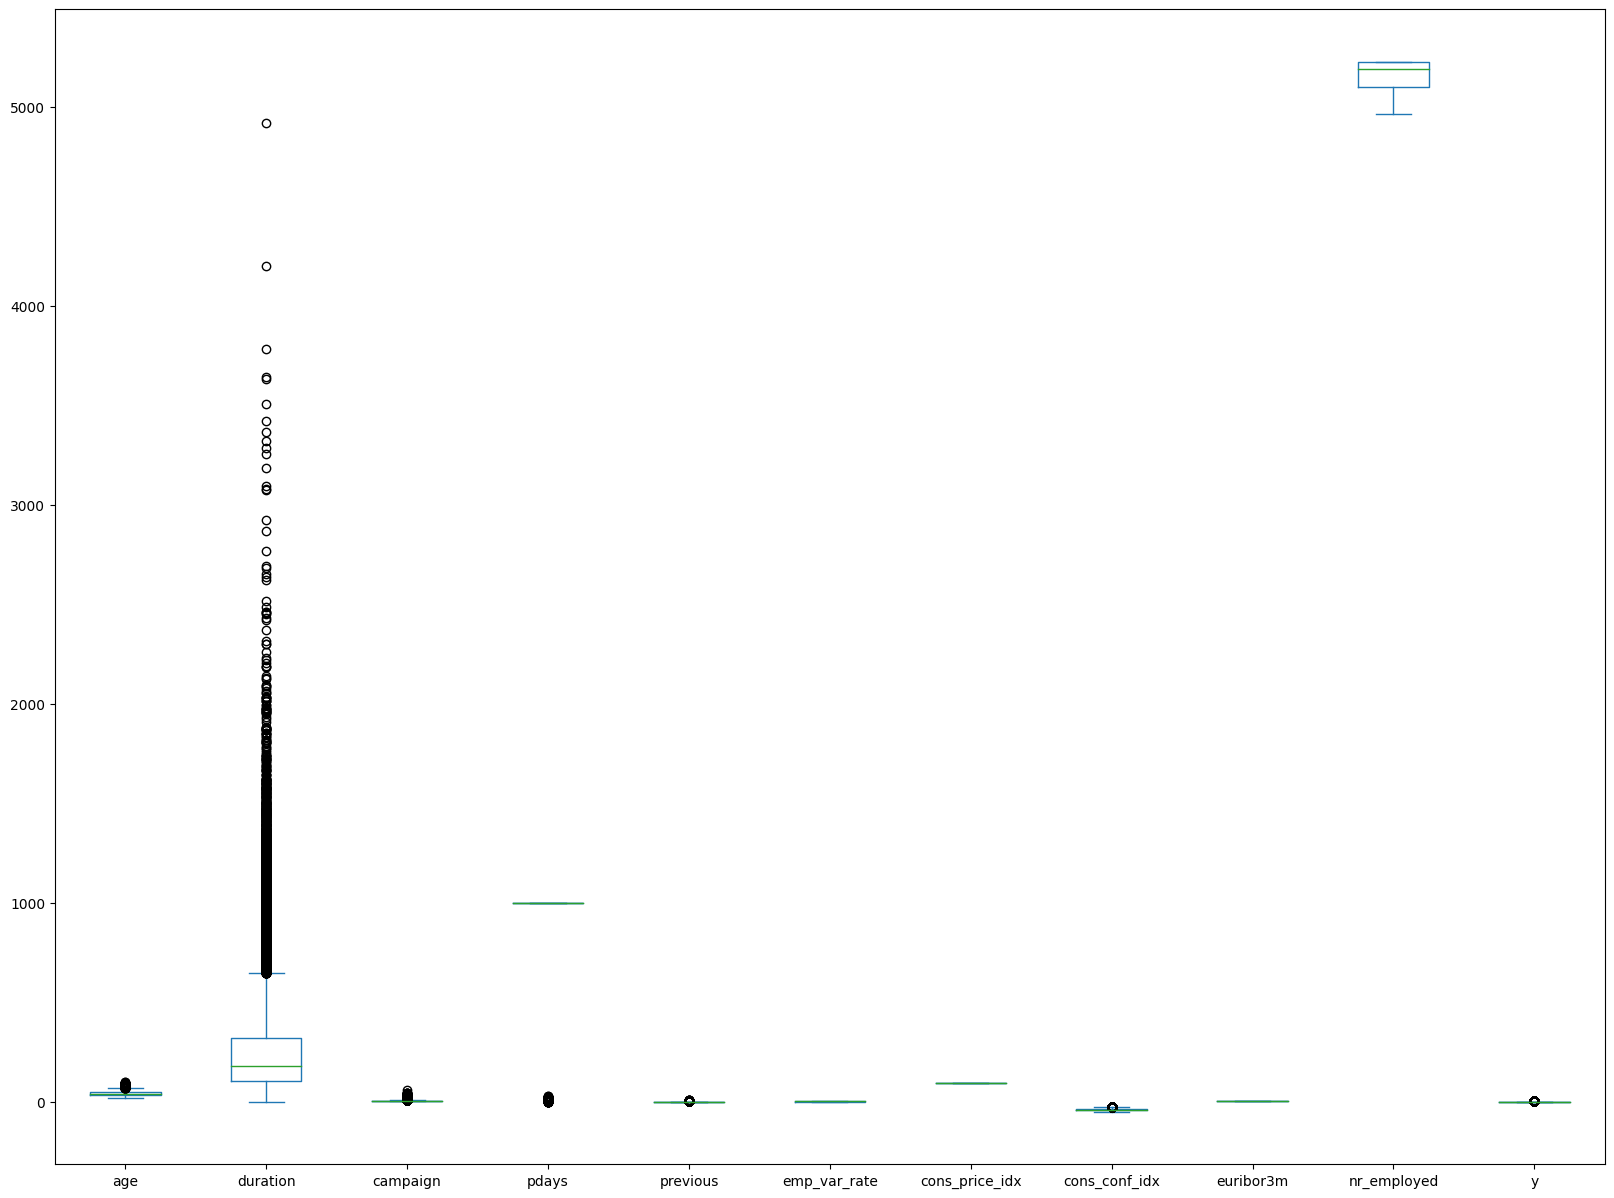

In [ ]:
dff_bank_p.plot.box(figsize=(20,15))

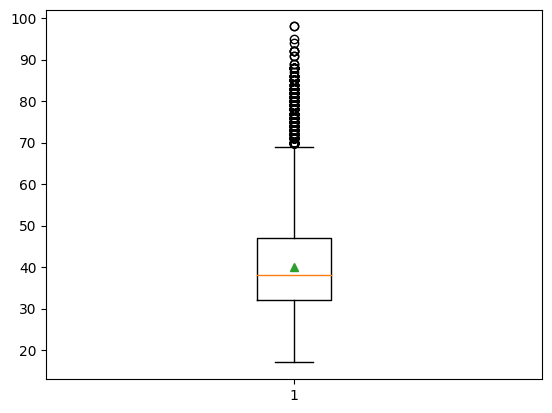

In [ ]:
bp_age = plt.boxplot(dff_bank_p['age'], showmeans=True,showcaps=True)


In [ ]:
[item.get_ydata() for item in bp_age['caps']]


[array([17, 17], dtype=int32), array([69, 69], dtype=int32)]

In [ ]:
dff_bank3.filter('age>69').show()

+---+-------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|    job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 73|retired|divorced|           basic.4y|     no|    yes|  no| cellular|  oct|        mon|     127|       2|  999|       3|    failure|        -3.4|        92.431|        -26.9|    0.731|     5017.5|  0|
| 78|retired|divorced|           basic.4y|     no|    yes|  no| cellular|  nov|        thu|     463|       1|    3|       1|    success|        -3.4|        92.649|        -30.1|  

In [ ]:
dff_bank3 = dff_bank3.filter(dff_bank3['age']<=69)


In [ ]:
dff_bank3.filter('age>69').show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



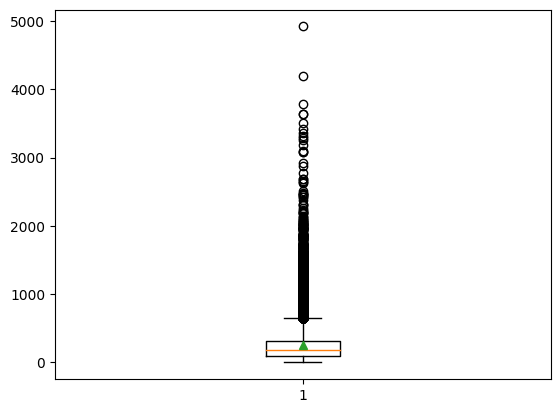

In [ ]:
bp_duration = plt.boxplot(dff_bank_p['duration'], showmeans=True,showcaps=True)


In [ ]:
[item.get_ydata() for item in bp_duration['caps']]


[array([0, 0], dtype=int32), array([644, 644], dtype=int32)]

In [ ]:
dff_bank3 = dff_bank3.filter(dff_bank3['duration']<=644)
dff_bank3.filter('duration>644').show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



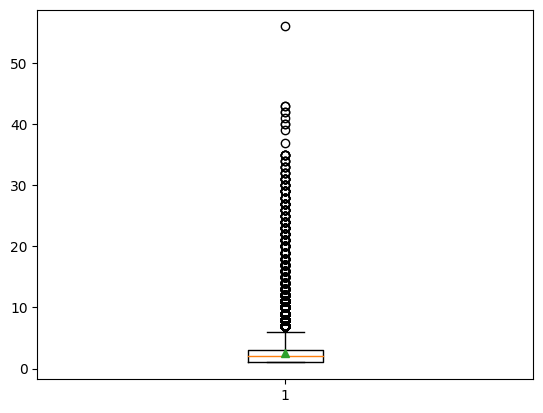

In [ ]:
bp_campaign = plt.boxplot(dff_bank_p['campaign'], showmeans=True,showcaps=True)


In [ ]:
[item.get_ydata() for item in bp_campaign['caps']]


[array([1, 1], dtype=int32), array([6, 6], dtype=int32)]

In [ ]:
dff_bank3 = dff_bank3.filter(dff_bank3['campaign']<=6)
dff_bank3.filter('campaign>6').show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



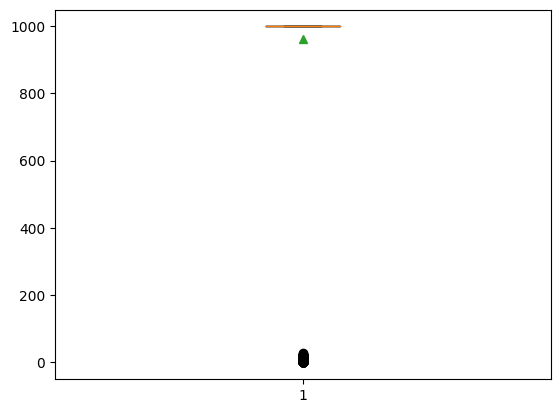

In [ ]:
bp_pdays = plt.boxplot(dff_bank_p['pdays'], showmeans=True,showcaps=True)





In [ ]:
[item.get_ydata() for item in bp_pdays['caps']]


[array([999, 999], dtype=int32), array([999, 999], dtype=int32)]

In [ ]:

dff_bank3 = dff_bank3.filter(dff_bank3['pdays']==999)
dff_bank3.filter('pdays>999').show()
dff_bank3.filter('pdays<999').show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|

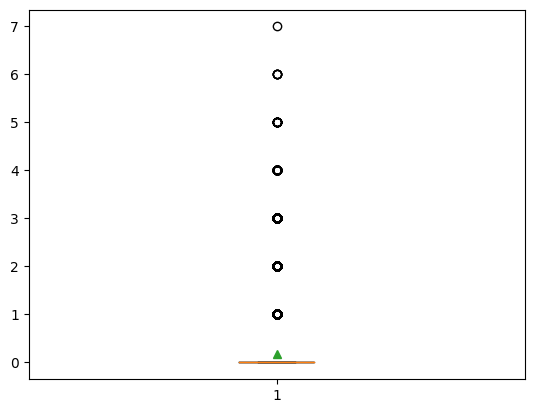

In [ ]:
bp_pervious = plt.boxplot(dff_bank_p['previous'], showmeans=True,showcaps=True)


In [ ]:
[item.get_ydata() for item in bp_pervious['caps']]


[array([0, 0], dtype=int32), array([0, 0], dtype=int32)]

In [ ]:
dff_bank3.filter('previous>0').show()




+---+-------------+--------+-------------------+-------+-------+-------+---------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|          job| marital|          education|default|housing|   loan|  contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-------------+--------+-------------------+-------+-------+-------+---------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
| 33|       admin.| married|  university.degree|     no|     no|     no| cellular|  may|        thu|     245|       5|  999|       1| failure|        -1.8|        92.893|        -46.2|    1.327|     5099.1|  0|
| 38|   technician|divorced|  university.degree|     no|     no|     no| cellular|  apr|        wed|     141|       2|  999|       2| failure|        -1.8| 

In [ ]:
dff_bank3 = dff_bank3.filter(dff_bank3['previous']==0)

In [ ]:
dff_bank3.filter('previous>0').show()


+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



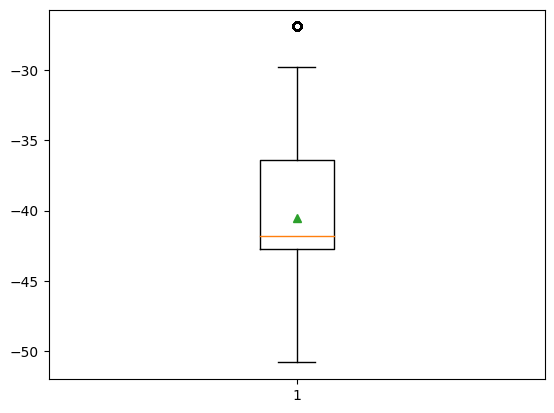

In [ ]:

bp_cons_conf_idx = plt.boxplot(dff_bank_p['cons_conf_idx'], showmeans=True,showcaps=True)


In [ ]:
[item.get_ydata() for item in bp_cons_conf_idx['caps']]


[array([-50.8, -50.8]), array([-29.8, -29.8])]

In [ ]:
dff_bank3 = dff_bank3.filter(dff_bank3['cons_conf_idx']<=-29.8)
dff_bank3.filter('cons_conf_idx>29.8').show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



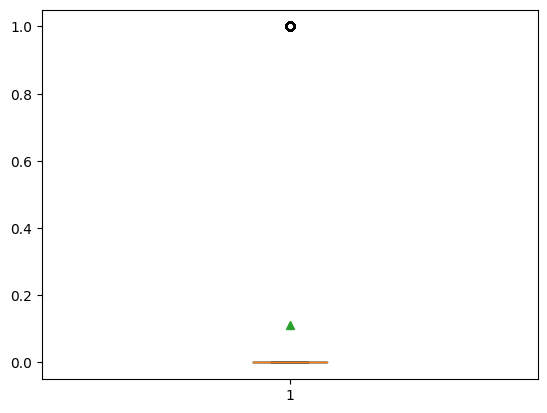

In [ ]:
bp_y = plt.boxplot(dff_bank_p['y'], showmeans=True,showcaps=True)


In [ ]:
[item.get_ydata() for item in bp_y['caps']]


[array([0, 0], dtype=int32), array([0, 0], dtype=int32)]

In [ ]:
dff_bank3 = dff_bank3.filter((dff_bank3['y']==0)|(dff_bank3['y']==1))
dff_bank3.filter('y>1').show()
dff_bank3.filter('1<0').show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|

In [ ]:
dff_bank4 = dff_bank3

In [ ]:
numeric_col  = [x[0] for x in dff_bank4.dtypes if x[1]!= 'string']
numeric_col_dff = dff_bank4.select(numeric_col)


In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import corr

In [ ]:
col_names = numeric_col_dff.columns
feature = numeric_col_dff.rdd.map(lambda row:row[0:])
#corr_m = .corr(features,method="pearson")

In [ ]:
col_names

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

In [ ]:
#Correlation.corr(dff_bank4,col_names).head()
dff_bank4.stat.corr('age','duration')

0.000903078828147521

In [ ]:
dff_bank4.corr

<bound method DataFrame.corr of DataFrame[age: int, job: string, marital: string, education: string, default: string, housing: string, loan: string, contact: string, month: string, day_of_week: string, duration: int, campaign: int, pdays: int, previous: int, poutcome: string, emp_var_rate: double, cons_price_idx: double, cons_conf_idx: double, euribor3m: double, nr_employed: double, y: int]>

In [ ]:
dff_bank4[col_names].show()

+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+
|age|duration|campaign|pdays|previous|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+
| 30|     116|       1|  999|       0|        -1.8|        92.843|        -50.0|    1.811|     5099.1|  1|
| 34|     146|       1|  999|       0|         1.4|        93.444|        -36.1|    4.968|     5228.1|  0|
| 27|     120|       1|  999|       0|         1.4|        93.918|        -42.7|    4.961|     5228.1|  0|
| 32|     209|       1|  999|       0|        -1.8|        92.893|        -46.2|    1.313|     5099.1|  0|
| 48|     348|       2|  999|       0|         1.4|        93.444|        -36.1|    4.965|     5228.1|  0|
| 33|     145|       2|  999|       0|         1.4|        93.918|        -42.7|     4.96|     5228.1|  0|
| 53|     351|       1|  999|       0

In [ ]:
dff_bank4_p= dff_bank4[col_names].toPandas()

In [ ]:
dff_bank4_p.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,116,1,999,0,-1.8,92.843,-50.0,1.811,5099.1,1
1,34,146,1,999,0,1.4,93.444,-36.1,4.968,5228.1,0
2,27,120,1,999,0,1.4,93.918,-42.7,4.961,5228.1,0
3,32,209,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,0
4,48,348,2,999,0,1.4,93.444,-36.1,4.965,5228.1,0


In [ ]:
dff_bank4_corr = dff_bank4_p.corr()


In [ ]:
dff_bank4_corr






,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,0.000903,0.011035,NaN,NaN,0.081601,0.044938,0.107444,0.092345,0.080161,-0.029425
duration,0.000903,1.000000,-0.056114,NaN,NaN,-0.041285,-0.009544,-0.001549,-0.042370,-0.054691,0.260089
campaign,0.011035,-0.056114,1.000000,NaN,NaN,0.073818,0.060048,-0.009751,0.057312,0.069804,-0.041689
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_var_rate,0.081601,-0.041285,0.073818,NaN,NaN,1.000000,0.783043,0.378297,0.975943,0.922534,-0.306550
cons_price_idx,0.044938,-0.009544,0.060048,NaN,NaN,0.783043,1.000000,0.182768,0.723606,0.588922,-0.182667
cons_conf_idx,0.107444,-0.001549,-0.009751,NaN,NaN,0.378297,0.182768,1.000000,0.439164,0.257667,-0.032101
euribor3m,0.092345,-0.042370,0.057312,NaN,NaN,0.975943,0.723606,0.439164,1.000000,0.946765,-0.301908
nr_employed,0.080161,-0.054691,0.069804,NaN,NaN,0.922534,0.588922,0.257667,0.946765,1.000000,-0.329603


<Axes: >

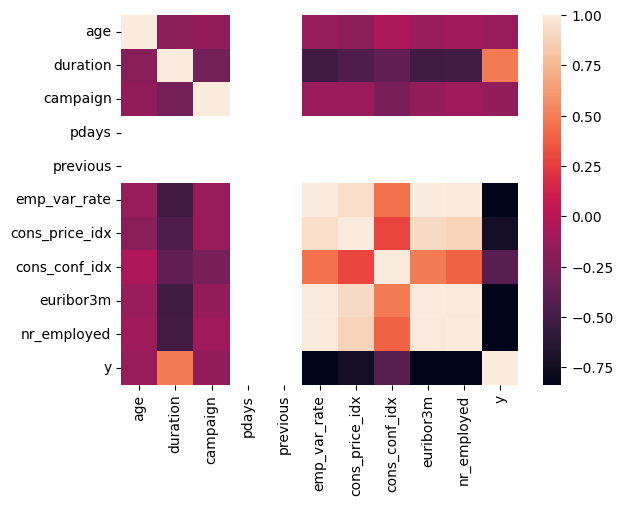

In [ ]:

from seaborn import heatmap
heatmap(dff_bank4_corr.corr())

In [ ]:
dff_bank4.show()

+---+------------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|         job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+------------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 30|  management| married|university.degree|     no|     no|  no| cellular|  mar|        mon|     116|       1|  999|       0|nonexistent|        -1.8|        92.843|        -50.0|    1.811|     5099.1|  1|
| 34|      admin.| married|university.degree|unknown|     no|  no| cellular|  aug|        tue|     146|       1|  999|       0|nonexistent|         1.4|        93.444| 

In [ ]:

dff_bank5 = dff_bank4

In [ ]:
from pyspark.ml.feature import StringIndexer 

In [ ]:
cat_col = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [ ]:
cat_col_in = ['job_in','marital_in','education_in','default_in','housing_in','loan_in','contact_in','month_in','day_of_week_in','poutcome_in']

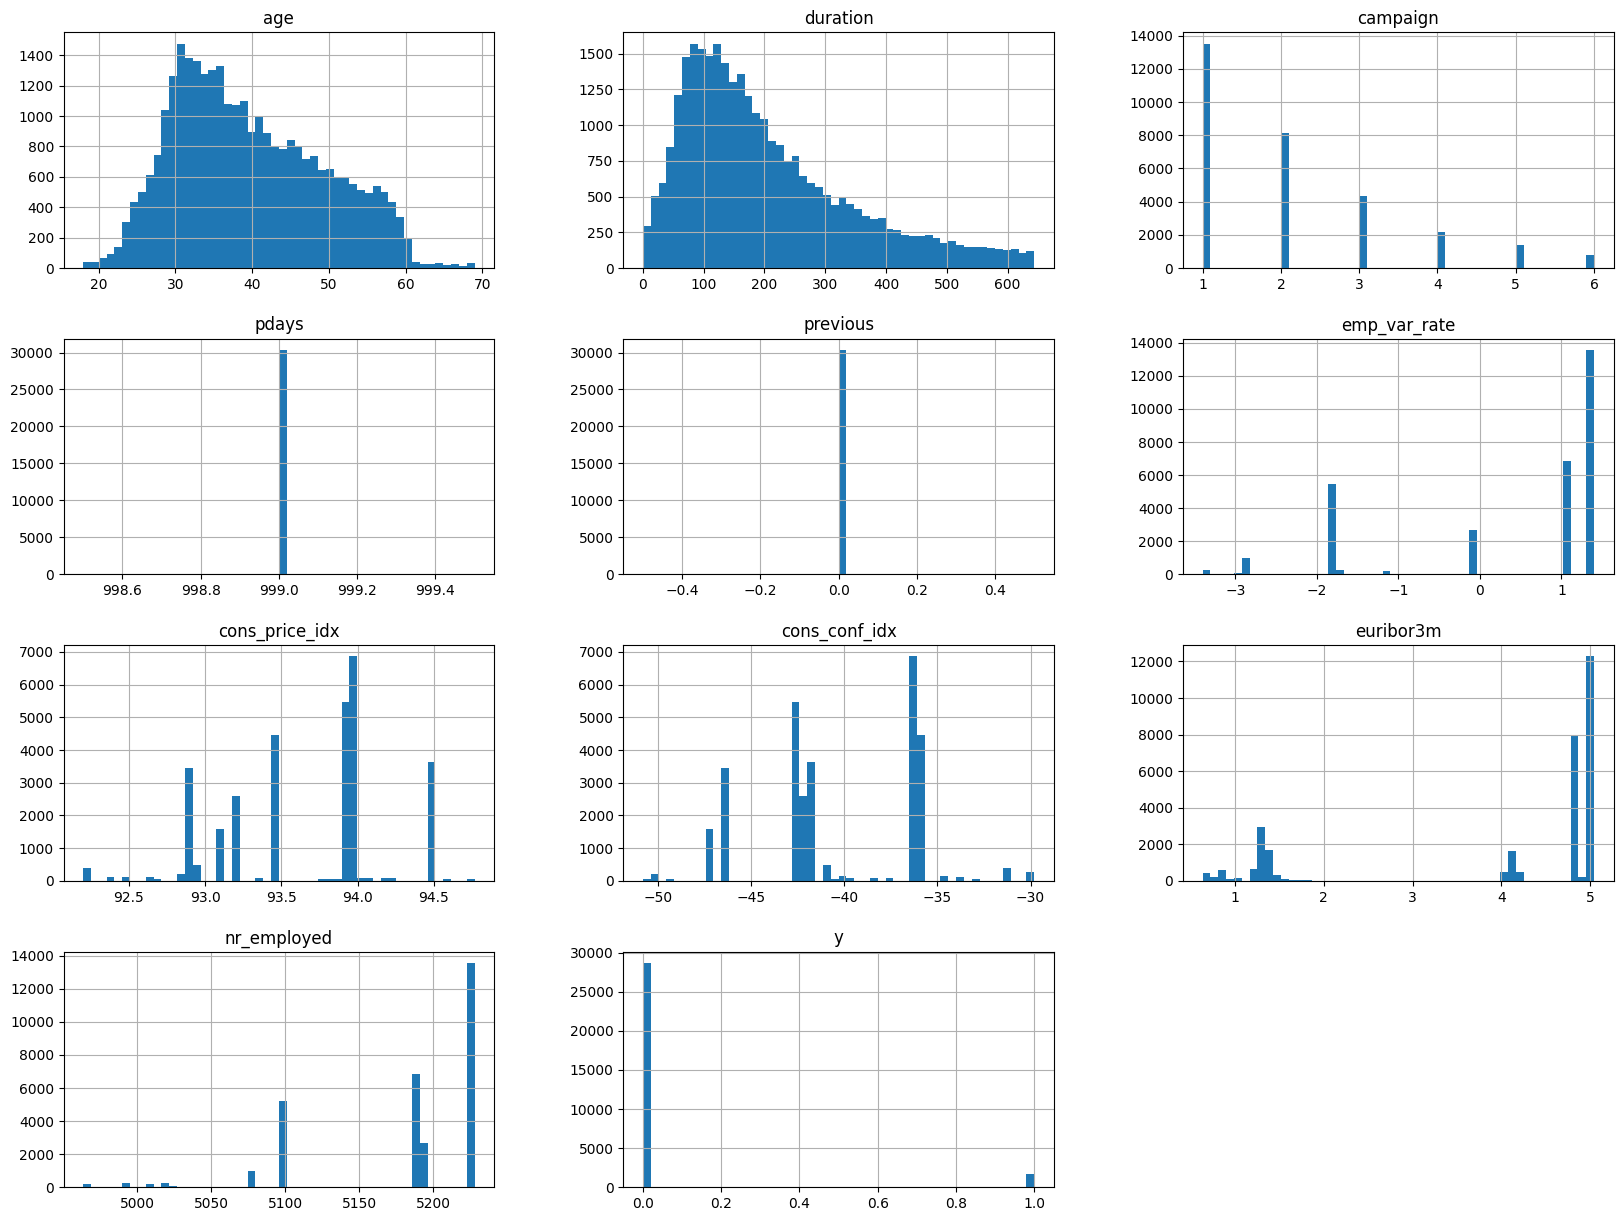

In [ ]:

dff_bank5_pp = dff_bank5.toPandas()
dff_bank5_pp[numeric_col].hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
indexr_q = StringIndexer(inputCols=cat_col,outputCols=cat_col_in)

In [ ]:
dff_bank5_in = indexr_q.fit(dff_bank5).transform(dff_bank5)


In [ ]:
dff_bank5_in.show()

+---+------------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+
|age|         job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|job_in|marital_in|education_in|default_in|housing_in|loan_in|contact_in|month_in|day_of_week_in|poutcome_in|
+---+------------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+
| 30|  management| married|university.degree|     no

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
all_indexed_col = numeric_col+cat_col_in
all_indexed_col

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_in',
 'marital_in',
 'education_in',
 'default_in',
 'housing_in',
 'loan_in',
 'contact_in',
 'month_in',
 'day_of_week_in',
 'poutcome_in']

In [ ]:
dff_indexed  = dff_bank5_in[all_indexed_col]

In [ ]:
dff_indexed.show(5)

+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+
|age|duration|campaign|pdays|previous|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|job_in|marital_in|education_in|default_in|housing_in|loan_in|contact_in|month_in|day_of_week_in|poutcome_in|
+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+
| 30|     116|       1|  999|       0|        -1.8|        92.843|        -50.0|    1.811|     5099.1|  1|   4.0|       0.0|         0.0|       0.0|       1.0|    0.0|       0.0|     6.0|           0.0|        0.0|
| 34|     146|       1|  999|       0|         1.4|        93.444|        -36.1|    4.968|     5228.1|  0|   0.0|       0.0|         0.0|   

In [ ]:
dff_indexed_y = dff_indexed.select('y')

In [ ]:
dff_indexed.show(5)

+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+
|age|duration|campaign|pdays|previous|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|job_in|marital_in|education_in|default_in|housing_in|loan_in|contact_in|month_in|day_of_week_in|poutcome_in|
+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+
| 30|     116|       1|  999|       0|        -1.8|        92.843|        -50.0|    1.811|     5099.1|  1|   4.0|       0.0|         0.0|       0.0|       1.0|    0.0|       0.0|     6.0|           0.0|        0.0|
| 34|     146|       1|  999|       0|         1.4|        93.444|        -36.1|    4.968|     5228.1|  0|   0.0|       0.0|         0.0|   

In [ ]:
dff_indexed_p = dff_indexed.toPandas()

In [ ]:
dff_indexed2_corr = dff_indexed_p.corr()


In [ ]:
dff_indexed2_corr

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,job_in,marital_in,education_in,default_in,housing_in,loan_in,contact_in,month_in,day_of_week_in,poutcome_in
age,1.000000,0.000903,0.011035,NaN,NaN,0.081601,0.044938,0.107444,0.092345,0.080161,...,0.122787,-0.123418,0.171871,0.204537,0.005516,-0.002802,0.035426,0.031183,-0.006344,NaN
duration,0.000903,1.000000,-0.056114,NaN,NaN,-0.041285,-0.009544,-0.001549,-0.042370,-0.054691,...,0.003498,0.003788,0.015271,-0.005733,0.003357,-0.012275,-0.024868,-0.026482,-0.002404,NaN
campaign,0.011035,-0.056114,1.000000,NaN,NaN,0.073818,0.060048,-0.009751,0.057312,0.069804,...,-0.013215,0.007225,0.004736,0.017575,0.004239,0.007427,0.026276,-0.061258,-0.014720,NaN
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_var_rate,0.081601,-0.041285,0.073818,NaN,NaN,1.000000,0.783043,0.378297,0.975943,0.922534,...,-0.050294,-0.044526,0.064639,0.180833,0.059486,0.006355,0.347496,-0.264911,0.020184,NaN
cons_price_idx,0.044938,-0.009544,0.060048,NaN,NaN,0.783043,1.000000,0.182768,0.723606,0.588922,...,-0.014738,-0.024995,0.106843,0.165940,0.089575,0.009412,0.626938,-0.170845,0.017671,NaN
cons_conf_idx,0.107444,-0.001549,-0.009751,NaN,NaN,0.378297,0.182768,1.000000,0.439164,0.257667,...,0.015469,-0.057490,-0.010203,0.063258,0.038894,-0.000871,0.310258,-0.199116,0.052043,NaN
euribor3m,0.092345,-0.042370,0.057312,NaN,NaN,0.975943,0.723606,0.439164,1.000000,0.946765,...,-0.042167,-0.048132,0.057170,0.170722,0.058960,0.005017,0.355709,-0.220551,0.025947,NaN
nr_employed,0.080161,-0.054691,0.069804,NaN,NaN,0.922534,0.588922,0.257667,0.946765,1.000000,...,-0.056160,-0.041642,0.046022,0.159365,0.044244,0.005799,0.195952,-0.173853,0.013038,NaN


In [ ]:
dff_indexed=dff_indexed.withColumn("y1", dff_indexed['y'])

In [ ]:
dff_indexed.show()

+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+---+
|age|duration|campaign|pdays|previous|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|job_in|marital_in|education_in|default_in|housing_in|loan_in|contact_in|month_in|day_of_week_in|poutcome_in| y1|
+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+---+
| 30|     116|       1|  999|       0|        -1.8|        92.843|        -50.0|    1.811|     5099.1|  1|   4.0|       0.0|         0.0|       0.0|       1.0|    0.0|       0.0|     6.0|           0.0|        0.0|  1|
| 34|     146|       1|  999|       0|         1.4|        93.444|        -36.1|    4.968|     5228.1|  0|   0.0|       0.0|

In [ ]:
dff_indexed = dff_indexed.drop('y')

In [ ]:
dff_indexed=dff_indexed.withColumn("y", dff_indexed['y1'])

In [ ]:
dff_indexed = dff_indexed.drop('y1')

In [ ]:
dff_indexed.show()


+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+---+
|age|duration|campaign|pdays|previous|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|job_in|marital_in|education_in|default_in|housing_in|loan_in|contact_in|month_in|day_of_week_in|poutcome_in|  y|
+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+---+
| 30|     116|       1|  999|       0|        -1.8|        92.843|        -50.0|    1.811|     5099.1|   4.0|       0.0|         0.0|       0.0|       1.0|    0.0|       0.0|     6.0|           0.0|        0.0|  1|
| 34|     146|       1|  999|       0|         1.4|        93.444|        -36.1|    4.968|     5228.1|   0.0|       0.0|         0.0|       

In [ ]:
dff_indexed_full = dff_indexed

In [ ]:
dff_indexed_full_p = dff_indexed_full.toPandas()

In [ ]:
dff_indexed_full_p_c = dff_indexed_full_p.corr()

dff_indexed_full_p_c

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,marital_in,education_in,default_in,housing_in,loan_in,contact_in,month_in,day_of_week_in,poutcome_in,y
age,1.000000,0.000903,0.011035,NaN,NaN,0.081601,0.044938,0.107444,0.092345,0.080161,...,-0.123418,0.171871,0.204537,0.005516,-0.002802,0.035426,0.031183,-0.006344,NaN,-0.029425
duration,0.000903,1.000000,-0.056114,NaN,NaN,-0.041285,-0.009544,-0.001549,-0.042370,-0.054691,...,0.003788,0.015271,-0.005733,0.003357,-0.012275,-0.024868,-0.026482,-0.002404,NaN,0.260089
campaign,0.011035,-0.056114,1.000000,NaN,NaN,0.073818,0.060048,-0.009751,0.057312,0.069804,...,0.007225,0.004736,0.017575,0.004239,0.007427,0.026276,-0.061258,-0.014720,NaN,-0.041689
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_var_rate,0.081601,-0.041285,0.073818,NaN,NaN,1.000000,0.783043,0.378297,0.975943,0.922534,...,-0.044526,0.064639,0.180833,0.059486,0.006355,0.347496,-0.264911,0.020184,NaN,-0.306550
cons_price_idx,0.044938,-0.009544,0.060048,NaN,NaN,0.783043,1.000000,0.182768,0.723606,0.588922,...,-0.024995,0.106843,0.165940,0.089575,0.009412,0.626938,-0.170845,0.017671,NaN,-0.182667
cons_conf_idx,0.107444,-0.001549,-0.009751,NaN,NaN,0.378297,0.182768,1.000000,0.439164,0.257667,...,-0.057490,-0.010203,0.063258,0.038894,-0.000871,0.310258,-0.199116,0.052043,NaN,-0.032101
euribor3m,0.092345,-0.042370,0.057312,NaN,NaN,0.975943,0.723606,0.439164,1.000000,0.946765,...,-0.048132,0.057170,0.170722,0.058960,0.005017,0.355709,-0.220551,0.025947,NaN,-0.301908
nr_employed,0.080161,-0.054691,0.069804,NaN,NaN,0.922534,0.588922,0.257667,0.946765,1.000000,...,-0.041642,0.046022,0.159365,0.044244,0.005799,0.195952,-0.173853,0.013038,NaN,-0.329603


<Axes: >

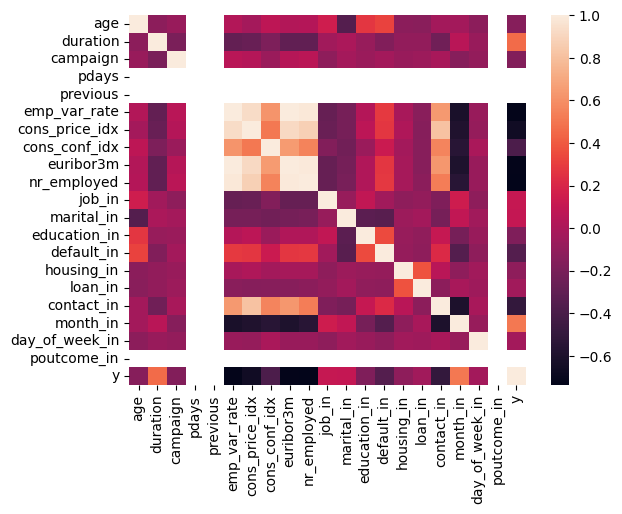

In [ ]:

from seaborn import heatmap
heatmap(dff_indexed_full_p_c.corr(),cmap="")

In [ ]:
corr_col_names =['duration','emp_var_rate','euribor3m','nr_employed','month_in']

In [ ]:
full_indexed_col_names = ['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'job_in',
 'marital_in',
 'education_in',
 'default_in',
 'housing_in',
 'loan_in',
 'contact_in',
 'month_in',
 'day_of_week_in',
 'poutcome_in','y']

In [ ]:
from pyspark.ml.linalg import Vectors


In [ ]:
from pyspark.ml.feature import StandardScaler


In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
dff_indexed_full.columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'job_in',
 'marital_in',
 'education_in',
 'default_in',
 'housing_in',
 'loan_in',
 'contact_in',
 'month_in',
 'day_of_week_in',
 'poutcome_in',
 'y']

In [ ]:
all_indexed_col2 = ['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'job_in',
 'marital_in',
 'education_in',
 'default_in',
 'housing_in',
 'loan_in',
 'contact_in',
 'month_in',
 'day_of_week_in',
 'poutcome_in']

In [ ]:
feature_assembeled = VectorAssembler(inputCols=all_indexed_col2,outputCol='InputFeature')

In [ ]:
out_put_dff_indexed_full= feature_assembeled.transform(dff_indexed_full)

In [ ]:
out_put_dff_indexed_full.show()

+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+---+--------------------+
|age|duration|campaign|pdays|previous|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|job_in|marital_in|education_in|default_in|housing_in|loan_in|contact_in|month_in|day_of_week_in|poutcome_in|  y|        InputFeature|
+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+---+--------------------+
| 30|     116|       1|  999|       0|        -1.8|        92.843|        -50.0|    1.811|     5099.1|   4.0|       0.0|         0.0|       0.0|       1.0|    0.0|       0.0|     6.0|           0.0|        0.0|  1|(20,[0,1,2,3,5,6,...|
| 34|     146|       1|  999|       0|         1.4|     

In [ ]:
dff_indexed_full2 =dff_indexed_full

In [ ]:
feature_assembeled2 = VectorAssembler(inputCols=corr_col_names,outputCol='InputFeature2')
out_put_dff_indexed_full2= feature_assembeled2.transform(dff_indexed_full2)
out_put_dff_indexed_full2.show()

+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+---+--------------------+
|age|duration|campaign|pdays|previous|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|job_in|marital_in|education_in|default_in|housing_in|loan_in|contact_in|month_in|day_of_week_in|poutcome_in|  y|       InputFeature2|
+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+---+--------------------+
| 30|     116|       1|  999|       0|        -1.8|        92.843|        -50.0|    1.811|     5099.1|   4.0|       0.0|         0.0|       0.0|       1.0|    0.0|       0.0|     6.0|           0.0|        0.0|  1|[116.0,-1.8,1.811...|
| 34|     146|       1|  999|       0|         1.4|     

In [ ]:
scaler = StandardScaler(inputCol="InputFeature", outputCol="scaledFeatures",
                        withStd=True, withMean=False)
scalerModel = scaler.fit(out_put_dff_indexed_full)
scaledData = scalerModel.transform(out_put_dff_indexed_full)
scaledData.show()

+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+---+--------------------+--------------------+
|age|duration|campaign|pdays|previous|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|job_in|marital_in|education_in|default_in|housing_in|loan_in|contact_in|month_in|day_of_week_in|poutcome_in|  y|        InputFeature|      scaledFeatures|
+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+---+--------------------+--------------------+
| 30|     116|       1|  999|       0|        -1.8|        92.843|        -50.0|    1.811|     5099.1|   4.0|       0.0|         0.0|       0.0|       1.0|    0.0|       0.0|     6.0|           0.0|        0.0|  1|(20,[0,1,2,3,5,

In [ ]:
scaledData_F_y=scaledData.select(['scaledFeatures','y'])

In [ ]:
scaledData_F_y.show()

+--------------------+---+
|      scaledFeatures|  y|
+--------------------+---+
|(20,[0,1,2,3,5,6,...|  1|
|[3.58626090762698...|  0|
|[2.84791307370378...|  0|
|[3.37530438364892...|  0|
|[5.06295657547338...|  0|
|(20,[0,1,2,3,5,6,...|  0|
|[5.59034788541853...|  0|
|(20,[0,1,2,3,5,6,...|  0|
|[5.80130440939659...|  0|
|[5.80130440939659...|  0|
|(20,[0,1,2,3,5,6,...|  0|
|[5.06295657547338...|  0|
|[3.58626090762698...|  1|
|[4.21913047956115...|  0|
|[6.64513050530882...|  0|
|[4.32460874155018...|  0|
|[5.16843483746241...|  0|
|[3.58626090762698...|  0|
|[3.79721743160504...|  0|
|[3.05886959768183...|  0|
+--------------------+---+
only showing top 20 rows



In [ ]:
scaler2 = StandardScaler(inputCol="InputFeature2", outputCol="scaledFeatures2",
                        withStd=True, withMean=False)
scalerModel2 = scaler2.fit(out_put_dff_indexed_full2)
scaledData22 = scalerModel2.transform(out_put_dff_indexed_full2)
scaledData22.show()

+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+---+--------------------+--------------------+
|age|duration|campaign|pdays|previous|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|job_in|marital_in|education_in|default_in|housing_in|loan_in|contact_in|month_in|day_of_week_in|poutcome_in|  y|       InputFeature2|     scaledFeatures2|
+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+------+----------+------------+----------+----------+-------+----------+--------+--------------+-----------+---+--------------------+--------------------+
| 30|     116|       1|  999|       0|        -1.8|        92.843|        -50.0|    1.811|     5099.1|   4.0|       0.0|         0.0|       0.0|       1.0|    0.0|       0.0|     6.0|           0.0|        0.0|  1|[116.0,-1.8,1.8

In [ ]:
scaledData_F_y2=scaledData22.select(['scaledFeatures2','y'])
scaledData_F_y2.show()

+--------------------+---+
|     scaledFeatures2|  y|
+--------------------+---+
|[0.82725347628238...|  1|
|[1.04119834083817...|  0|
|[0.85577945822315...|  0|
|[1.49048255640533...|  0|
|[2.48176042884715...|  0|
|[1.03406684535298...|  0|
|[2.50315491530273...|  0|
|[1.47621956543494...|  0|
|[0.67036057560813...|  0|
|[2.95957062635508...|  0|
|[1.44056208800897...|  0|
|[0.82012198079719...|  0|
|[2.85972968956238...|  1|
|[1.88984630357613...|  0|
|[0.34944327877445...|  0|
|[0.10697243227789...|  0|
|[0.91996291758989...|  0|
|[1.08398731374933...|  0|
|[0.39936374717080...|  0|
|[0.94848889953066...|  0|
+--------------------+---+
only showing top 20 rows



In [ ]:
train_data, test_data = scaledData_F_y.randomSplit([0.8,0.2])


In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol='scaledFeatures',labelCol='y',maxIter=5).fit(train_data)



In [ ]:
lr

LogisticRegressionModel: uid=LogisticRegression_df5aecccaba4, numClasses=2, numFeatures=20

In [ ]:
train_result = lr.evaluate(train_data).predictions

In [ ]:
train_result.show()

+--------------------+---+--------------------+--------------------+----------+
|      scaledFeatures|  y|       rawPrediction|         probability|prediction|
+--------------------+---+--------------------+--------------------+----------+
|(20,[0,1,2,3,5,6,...|  0|[3.84135229397620...|[0.97898649031975...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[3.79776002341780...|[0.97807073662919...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[2.73328475564223...|[0.93896236489969...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[3.93122812336833...|[0.98075795793914...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[2.17581514286653...|[0.89805658213893...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[3.26760842113884...|[0.96330071718185...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[2.91704020304429...|[0.94868239521825...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[2.72558737334963...|[0.93851971874656...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[2.29504947347647...|[0.90846620777441...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[2.46661812470

In [ ]:
results = lr.evaluate(test_data).predictions
results.show()

+--------------------+---+--------------------+--------------------+----------+
|      scaledFeatures|  y|       rawPrediction|         probability|prediction|
+--------------------+---+--------------------+--------------------+----------+
|(20,[0,1,2,3,5,6,...|  0|[3.08687361253451...|[0.95634803545260...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[3.29865331383940...|[0.96438258256790...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[1.55795697382088...|[0.82605999653352...|       0.0|
|(20,[0,1,2,3,5,6,...|  1|[2.45531549221128...|[0.92094929454732...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[1.61550283667995...|[0.83417398185634...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[-0.3705262394042...|[0.40841386969710...|       1.0|
|(20,[0,1,2,3,5,6,...|  0|[4.85828084839857...|[0.99229599291357...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[5.26236634331538...|[0.99484369985609...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[4.55191315662127...|[0.98956307136592...|       0.0|
|(20,[0,1,2,3,5,6,...|  0|[4.89718130552

In [ ]:
results.select(['y','prediction']).show(10)



+---+----------+
|  y|prediction|
+---+----------+
|  0|       0.0|
|  0|       0.0|
|  0|       0.0|
|  1|       0.0|
|  0|       0.0|
|  0|       1.0|
|  0|       0.0|
|  0|       0.0|
|  0|       0.0|
|  0|       0.0|
+---+----------+
only showing top 10 rows



In [ ]:
tp = results[(results.y==1)&(results.prediction==1)].count()
tp

70

In [ ]:
tn = results[(results.y==0)&(results.prediction==0)].count()
tn

5624

In [ ]:
fp = results[(results.y==0)&(results.prediction==1)].count()
fp

71

In [ ]:
fn = results[(results.y==1)&(results.prediction==0)].count()
fn

254

In [ ]:
accuracy = float((tp+tn)/(results.count()))
accuracy

0.9460043196544277

In [ ]:
recall = float(tn)/(tp+tn)
recall

0.9877063575693713

In [ ]:
train_data2, test_data2 = scaledData_F_y2.randomSplit([0.8,0.2])
from pyspark.ml.classification import LogisticRegression
lr2 = LogisticRegression(featuresCol='scaledFeatures2',labelCol='y',maxIter=5).fit(train_data2)
lr2

LogisticRegressionModel: uid=LogisticRegression_74e149e370ea, numClasses=2, numFeatures=5

In [ ]:
train_result2 = lr2.evaluate(train_data2).predictions
train_result2.show()

+--------------------+---+--------------------+--------------------+----------+
|     scaledFeatures2|  y|       rawPrediction|         probability|prediction|
+--------------------+---+--------------------+--------------------+----------+
|[0.00713149548519...|  0|[3.23103048989933...|[0.96198545531229...|       0.0|
|[0.03565747742596...|  0|[3.09003423785314...|[0.95647979025876...|       0.0|
|[0.03565747742596...|  0|[3.36294421843994...|[0.96652616296593...|       0.0|
|[0.03565747742596...|  0|[3.36294421843994...|[0.96652616296593...|       0.0|
|[0.03565747742596...|  0|[1.38687439609314...|[0.80009278944678...|       0.0|
|[0.03565747742596...|  0|[6.60258330403479...|[0.99864498024126...|       0.0|
|[0.03565747742596...|  0|[6.60383274448738...|[0.99864666991076...|       0.0|
|[0.04278897291115...|  0|[4.5326102854875,...|[0.98936181571772...|       0.0|
|[0.04278897291115...|  0|[2.78542767954422...|[0.94188326474824...|       0.0|
|[0.04278897291115...|  0|[3.08263233559

In [ ]:
results2 = lr2.evaluate(test_data2).predictions
results2.show()

+--------------------+---+--------------------+--------------------+----------+
|     scaledFeatures2|  y|       rawPrediction|         probability|prediction|
+--------------------+---+--------------------+--------------------+----------+
|[0.02852598194077...|  0|[4.54116688773470...|[0.98945149799882...|       0.0|
|[0.02852598194077...|  0|[6.49361529629490...|[0.99848921700327...|       0.0|
|[0.03565747742596...|  0|[1.64479109124886...|[0.83818580819329...|       0.0|
|[0.03565747742596...|  0|[1.38284842130146...|[0.79944807960986...|       0.0|
|[0.03565747742596...|  0|[6.60383274448738...|[0.99864666991076...|       0.0|
|[0.04278897291115...|  0|[4.54135636865563...|[0.98945347547158...|       0.0|
|[0.04992046839635...|  0|[1.63054259360652...|[0.83624395510329...|       0.0|
|[0.05705196388154...|  0|[5.00592788836932...|[0.99334644299245...|       0.0|
|[0.06418345936673...|  0|[3.16404097570926...|[0.95945842429387...|       0.0|
|[0.06418345936673...|  0|[6.57366982859

In [ ]:
results2.select(['y','prediction']).show(10)


+---+----------+
|  y|prediction|
+---+----------+
|  0|       0.0|
|  0|       0.0|
|  0|       0.0|
|  0|       0.0|
|  0|       0.0|
|  0|       0.0|
|  0|       0.0|
|  0|       0.0|
|  0|       0.0|
|  0|       0.0|
+---+----------+
only showing top 10 rows



In [ ]:
tp2 = results2[(results2.y==1)&(results2.prediction==1)].count()
print("tp2 ",tp2)
tn2 = results2[(results2.y==0)&(results2.prediction==0)].count()
print("tn2",tn2)
fp2 = results2[(results2.y==0)&(results2.prediction==1)].count()
print("fp2 " ,fp2)

fn2 = results2[(results2.y==1)&(results2.prediction==0)].count()
print("fn2 ",fn2)

tp2  68
tn2 5636
fp2  58
fn2  304


In [ ]:
accuracy2 = float((tp2+tn2)/(results2.count()))
print("acc2 ",accuracy2)

recall2 = float(tn2)/(tp2+tn2)
print("recall2 ",recall2)

acc2  0.9403231124299374
recall2  0.988078541374474
